In [1]:
# Basic Imports
import sys
sys.path.insert(1, "../../")

import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Evaluation Imports
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Configurations
isDemoMode = True
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]
plt.style.use('default')

In [3]:
print(f"Default number of DF columns displayed {pd.get_option('display.max_columns')}")

# settings to display all columns
pd.set_option("display.max_columns", None)

Default number of DF columns displayed 20


In [4]:
df = pd.read_csv(DATA_FILE_NAME)
df = df[::15]
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
15,15,627127fabbd592fa2c7f25b8,62971.54,62541.28,1635527731,62531.62,60915.95,5121.220901,56425.0,62550.96,60608.95,62554.21,1.382506,62486.12,62531.42,62513.02,21000000.0,18858012.0,18858012.0,62541.599745,4.311201e+10,6.1111,-0.366133,2.361134,2.388851,26.873643,29.945589,49.972913,1.179410e+12,43.4826,1.313374e+12,0.000834
30,30,627127fabbd592fa2c7f25c7,62971.54,62505.02,1635529300,62496.24,60950.29,5200.503262,56425.0,62502.94,60608.95,62552.18,0.299922,62505.02,62516.47,62552.18,21000000.0,18858012.0,18858012.0,62525.760363,4.288535e+10,4.7327,-0.021597,2.406680,2.941529,26.873643,29.810102,49.972913,1.179112e+12,43.4826,1.313041e+12,0.123475
45,45,627127fabbd592fa2c7f25d6,62971.54,62385.18,1635530148,62384.03,60959.83,5218.017958,56425.0,62399.55,60608.95,62397.39,0.104318,62366.89,62385.18,62397.39,21000000.0,18858012.0,18858012.0,62363.738108,4.286657e+10,4.5434,-0.543703,2.119603,2.870641,26.873643,29.471630,49.972913,1.176056e+12,43.4826,1.309639e+12,0.262691
60,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,1635530994,62394.14,60962.99,5204.297994,56425.0,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246720,246720,62712800bbd592fa2c82e969,38786.95,38414.87,1651348288,38382.42,38519.83,594.586166,38160.4,38407.03,38599.30,38414.87,0.375000,38414.11,38414.87,38414.11,21000000.0,19026737.0,19026737.0,38377.632064,2.170324e+10,-21.8359,0.270777,0.247061,-3.430754,-16.083945,-12.392731,2.109056,7.302011e+11,42.0843,8.059303e+11,0.190067
246735,246735,62712800bbd592fa2c82e978,38786.95,38445.18,1651349318,38431.28,38539.51,563.808424,38160.4,38445.72,38599.30,38450.33,0.010864,38445.18,38445.72,38450.33,21000000.0,19026737.0,19026737.0,38456.778990,2.138914e+10,-23.4249,0.232198,0.148902,-3.406210,-15.717118,-12.409961,2.722041,7.317070e+11,42.0415,8.075924e+11,0.401900
246750,246750,62712800bbd592fa2c82e987,38786.95,38384.58,1651350349,38370.64,38540.97,566.041421,38160.4,38384.58,38599.30,38384.58,0.005985,38383.18,38384.58,38383.18,21000000.0,19026825.0,19026825.0,38396.377241,2.121954e+10,-24.6754,0.135730,-0.319612,-3.488027,-16.027128,-12.412714,1.877778,7.305612e+11,42.0036,8.063239e+11,-0.171560
246765,246765,62712800bbd592fa2c82e996,38786.95,38351.20,1651351078,38331.79,38540.81,566.041421,38160.4,38350.37,38599.30,38369.57,0.204745,38350.77,38351.20,38354.16,21000000.0,19026825.0,19026825.0,38365.791488,2.111607e+10,-24.7143,0.002831,-0.417371,-3.630196,-16.079912,-12.589880,1.793039,7.299792e+11,42.0415,8.056816e+11,-0.096760


In [5]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,high_1min,volume_1min,low_1min,close_1min,open_1min,max_supply,circulating_supply,total_supply,quote_USD_price,quote_volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-29 17:09:28,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,62565.90,1.425169,62539.20,62561.86,62545.45,21000000.0,18858012.0,18858012.0,62556.005047,4.304916e+10,6.0514,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
2021-10-29 17:15:31,15,627127fabbd592fa2c7f25b8,62971.54,62541.28,62531.62,60915.95,5121.220901,56425.0,62550.96,60608.95,62554.21,1.382506,62486.12,62531.42,62513.02,21000000.0,18858012.0,18858012.0,62541.599745,4.311201e+10,6.1111,-0.366133,2.361134,2.388851,26.873643,29.945589,49.972913,1.179410e+12,43.4826,1.313374e+12,0.000834
2021-10-29 17:41:40,30,627127fabbd592fa2c7f25c7,62971.54,62505.02,62496.24,60950.29,5200.503262,56425.0,62502.94,60608.95,62552.18,0.299922,62505.02,62516.47,62552.18,21000000.0,18858012.0,18858012.0,62525.760363,4.288535e+10,4.7327,-0.021597,2.406680,2.941529,26.873643,29.810102,49.972913,1.179112e+12,43.4826,1.313041e+12,0.123475
2021-10-29 17:55:48,45,627127fabbd592fa2c7f25d6,62971.54,62385.18,62384.03,60959.83,5218.017958,56425.0,62399.55,60608.95,62397.39,0.104318,62366.89,62385.18,62397.39,21000000.0,18858012.0,18858012.0,62363.738108,4.286657e+10,4.5434,-0.543703,2.119603,2.870641,26.873643,29.471630,49.972913,1.176056e+12,43.4826,1.309639e+12,0.262691
2021-10-29 18:09:54,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,62394.14,60962.99,5204.297994,56425.0,62404.25,60608.95,62407.86,3.846862,62368.24,62397.57,62385.41,21000000.0,18858012.0,18858012.0,62376.389918,4.263720e+10,4.0919,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29 13:49:57,206490,627127ffbbd592fa2c824c43,48234.00,47603.68,47596.13,47676.86,2165.608918,46897.0,47619.56,47152.38,47674.37,4.127755,47597.27,47603.68,47657.99,21000000.0,18997168.0,18997168.0,47712.646461,3.640668e+10,-6.1969,-0.415101,0.450205,11.261541,22.631611,29.574160,1.618765,9.064052e+11,41.9114,1.001966e+12,0.159400
2022-03-29 14:03:04,206505,627127ffbbd592fa2c824c52,48234.00,47760.31,47744.40,47676.69,2129.884259,46897.0,47761.11,47152.38,47744.40,0.007683,47744.40,47744.40,47744.40,21000000.0,18997168.0,18997168.0,47688.687392,3.631643e+10,-7.8497,-0.324590,0.068476,11.349490,22.010434,29.295506,0.745302,9.059500e+11,42.0638,1.001462e+12,0.567486
2022-03-29 14:20:16,206520,627127ffbbd592fa2c824c61,48234.00,47708.53,47688.30,47679.37,2090.539455,46897.0,47708.53,47152.38,47708.53,0.002850,47708.53,47708.53,47708.53,21000000.0,18997287.0,18997287.0,47675.442538,3.609768e+10,-9.1578,-0.277283,0.344834,11.117794,22.246273,28.904939,0.746298,9.057041e+11,42.0252,1.001184e+12,0.598674


In [6]:
len(df)

13771

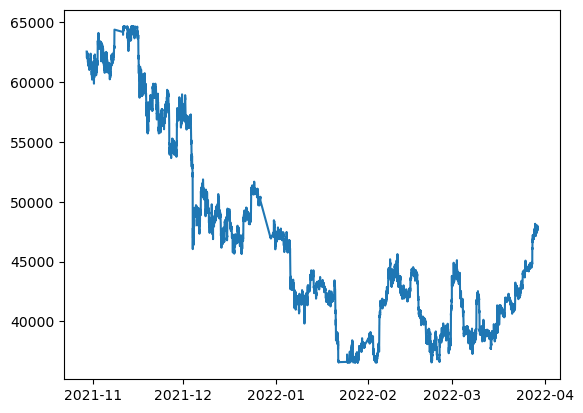

In [7]:
plt.plot(df.index, df['close_1min'] )
plt.show()

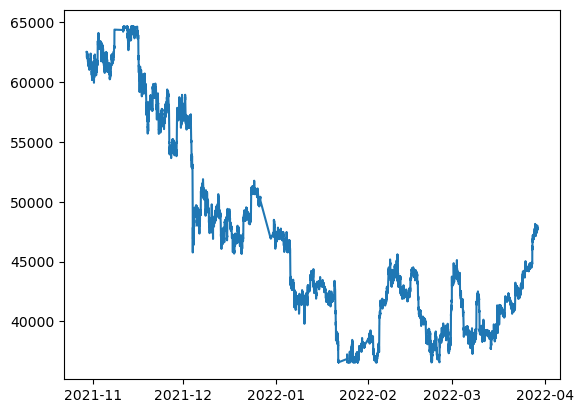

In [8]:
plt.plot(df.index, df['open_1min'])
plt.show()

In [9]:
n_steps = 15
X, y = utils.split_sequence(df['close_1min'], n_steps)
X

array([[62561.86, 62531.42, 62516.47, ..., 62374.66, 62429.92, 62461.86],
       [62531.42, 62516.47, 62385.18, ..., 62429.92, 62461.86, 62440.37],
       [62516.47, 62385.18, 62397.57, ..., 62461.86, 62440.37, 62480.44],
       ...,
       [47562.99, 47567.22, 47617.48, ..., 47889.1 , 47603.68, 47744.4 ],
       [47567.22, 47617.48, 47653.42, ..., 47603.68, 47744.4 , 47708.53],
       [47617.48, 47653.42, 47731.79, ..., 47744.4 , 47708.53, 47799.42]])

In [10]:
train_X, train_y, valid_X, valid_y, _, _ = utils.train_test_valid_split(
        X,
        y,
        train_size=0.8,
        valid_size=0.1
    )
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
11004
11004
1375
1375
1377
1377
----------------------------------------
----------------------------
-------- Train X: (11004, 15), Train y: (11004,) --------
-------- Valid X: (1375, 15), Valid y: (1375,) --------
----------------------------



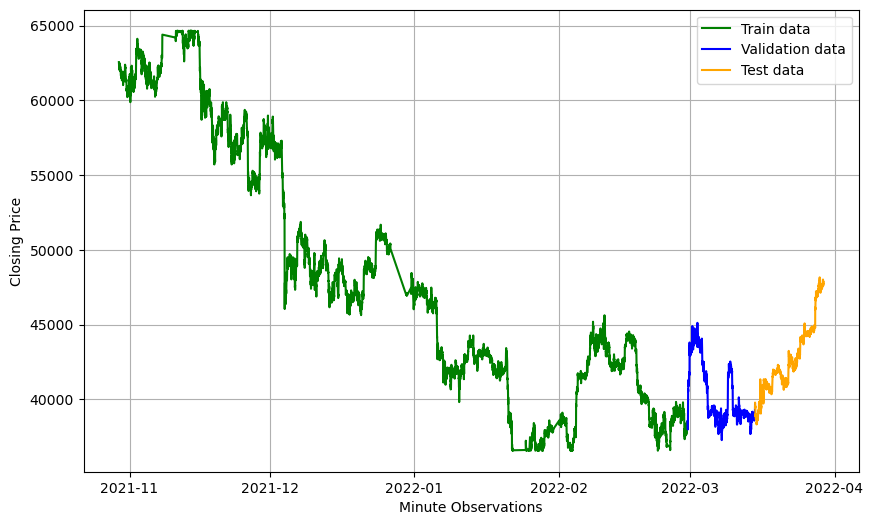

In [11]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df['close_1min'][:len(train_y)], 'green', label='Train data')
plt.plot(df['close_1min'][len(train_y):len(train_y)+len(valid_y)], 'blue', label='Validation data')
plt.plot(df['close_1min'][len(train_y)+len(valid_y):], 'orange', label='Test data')
plt.legend()

In [12]:
# Run the Augmented Dickey-Fuller test to test for stationarity
result = adfuller(df["close_1min"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If the p-value is less than 0.05, the time series is considered stationary
if result[1] < 0.05:
    print("The time series is stationary.")
    i = 0 # d = 0
else:
    print("The time series is not stationary.")
    i = 1 # d = 1
    data = df["close_1min"].diff().dropna() # take the first difference
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

ADF Statistic: -1.842163
p-value: 0.359739
The time series is not stationary.
ADF Statistic: -22.284604
p-value: 0.000000


In [13]:
total_len = len(train_y)+len(valid_y)
# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(df["close_1min"], order=(4,1,1))
results = model.fit()

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471

/Users/thanoskottaridis/miniconda3/envs/CryptoPrediction_NLP/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


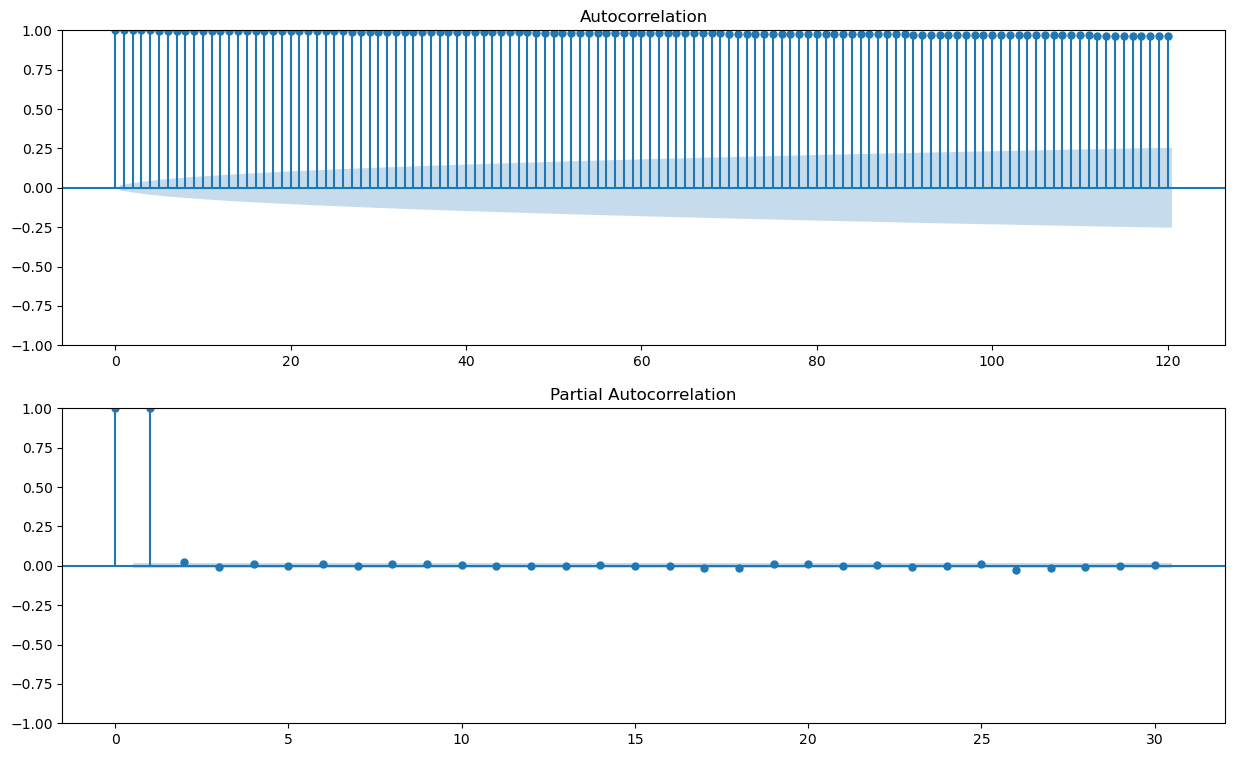

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_1min   No. Observations:                13771
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -89744.969
Date:                Thu, 26 Jan 2023   AIC                         179499.938
Time:                        23:39:05   BIC                         179537.589
Sample:                             0   HQIC                        179512.483
                              - 13771                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0312      0.004     -7.359      0.000      -0.040      -0.023
ar.L2          0.0096      0.004      2.184      0.029       0.001       0.018
ar.L3         -0.0124      0.006     -2.068      0.039      -0.024      -0.001
ar.L4          0.0001      0.006      0.018      0.986      -0.011       0.011
sigma2      2.683e+04     90.483    296.505      0.000    2.67e+04     2.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            515559.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 9))
plot_acf(df['close_1min'], lags=120, ax=ax1)
plot_pacf(df['close_1min'], lags=30, ax=ax2)
plt.show()

# Show model samary
results.summary()

In [14]:
valid_predictions = results.predict(start=len(train_X), end=total_len-1)
valid_predictions

datetime
2022-02-28 12:37:17    38540.321094
2022-02-28 12:53:26    38597.105502
2022-02-28 13:05:37    38462.963849
2022-02-28 13:21:45    38270.271017
2022-02-28 13:37:53    38251.708563
                           ...     
2022-03-14 22:09:29    38726.562901
2022-03-14 22:25:35    38806.269397
2022-03-14 22:39:42    39042.747998
2022-03-14 22:54:52    39103.874251
2022-03-14 23:16:07    39376.314548
Name: predicted_mean, Length: 1375, dtype: float64

In [15]:
valid_y

array([41200.  , 41035.17, 41039.9 , ..., 38934.18, 39037.86, 38997.06])

In [16]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df[len(train_X):total_len]['close_1min'], valid_predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 169.413 


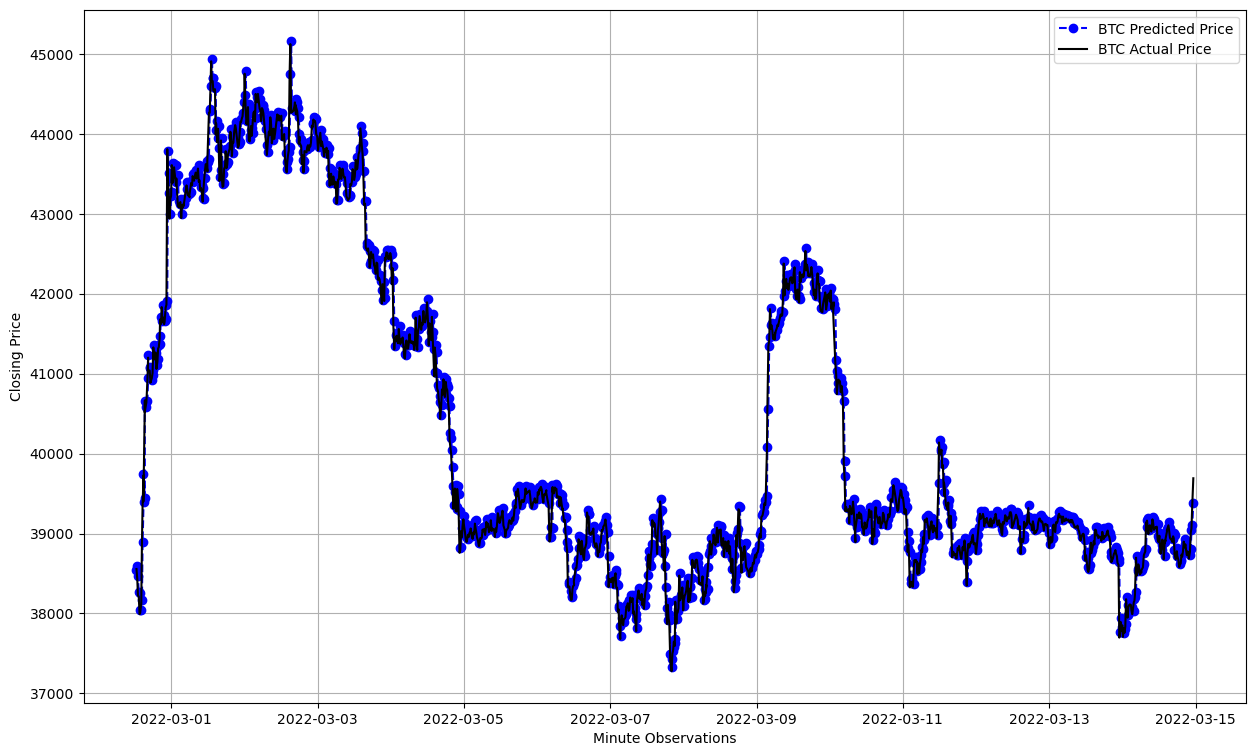

In [17]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(valid_predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df[len(train_X):total_len]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()

In [18]:
test_predictions = results.predict(start=total_len, end=len(df)-1)
test_predictions

datetime
2022-03-14 23:25:12    39776.677847
2022-03-14 23:40:22    39864.427604
2022-03-14 23:56:32    39736.215205
2022-03-15 00:16:40    39789.780391
2022-03-15 00:24:46    39538.390447
                           ...     
2022-03-29 13:49:57    47983.719920
2022-03-29 14:03:04    47706.400688
2022-03-29 14:20:16    47830.879389
2022-03-29 14:33:28    47808.548918
2022-03-29 14:48:36    47888.461526
Name: predicted_mean, Length: 1392, dtype: float64

In [19]:
# calculating prediction error.
# calculate RMSE
rmse = sqrt(mean_squared_error(df[total_len:]['close_1min'], test_predictions))
print('RNSE error = %.3f ' %rmse)

RNSE error = 157.724 


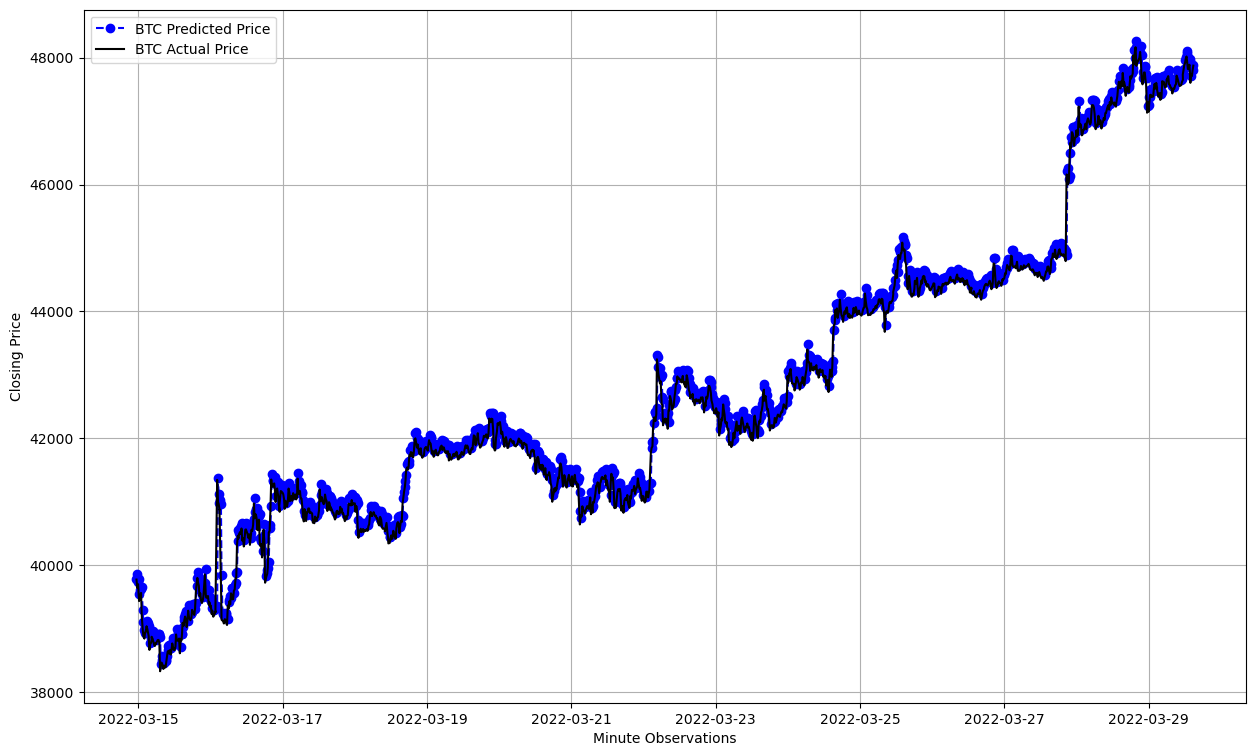

In [20]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[len(train_y):len(train_y)+len(valid_y)].index

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(test_predictions, color='blue', marker="o", linestyle="dashed", label='BTC Predicted Price')
plt.plot(df[total_len:]['close_1min'], 'black', label='BTC Actual Price')
plt.legend()